In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
base_url = "https://drive.google.com/uc?id={}"
file_id = "1-MZIJzBDP-314JfwxXt9O07e5HzYW2Ud"
url = (base_url).format(file_id)
df = pd.read_csv(url)

# 1.0 Load Dataframe

In [ ]:
df.head(3)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1


# 1.1 Change column to lowercase and change to appropriate date

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
# change date to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df[df['date'] < '2018-01-01']

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
# add hour column
df['hour'] = df['time'].dt.strftime('%H')

# 1.2 Check Missing Values and Duplicated

In [ ]:
missing_val = df.isnull().sum()
missing_val

date                    0
time                    0
s1_temp                 0
s2_temp                 0
s3_temp                 0
s4_temp                 0
s1_light                0
s2_light                0
s3_light                0
s4_light                0
s1_sound                0
s2_sound                0
s3_sound                0
s4_sound                0
s5_co2                  0
s5_co2_slope            0
s6_pir                  0
s7_pir                  0
room_occupancy_count    0
hour                    0
dtype: int64

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,date,time,s1_temp,s2_temp,s3_temp,s4_temp,s1_light,s2_light,s3_light,s4_light,s1_sound,s2_sound,s3_sound,s4_sound,s5_co2,s5_co2_slope,s6_pir,s7_pir,room_occupancy_count,hour


# 1.3 Room Occupancy Trend and Rates

In [ ]:
grup_hour = df.groupby(['hour','room_occupancy_count']).size().reset_index(name = 'count')
grup_hour = grup_hour[grup_hour['room_occupancy_count'] > 0]
grup_hour.head(1)

,hour,room_occupancy_count,count
11,10,1,21


In [ ]:
pivot_hour = grup_hour.pivot(index = 'room_occupancy_count', columns = ['hour'], values = ['count'])
pivot_hour.fillna(0, inplace = True)
pivot_hour

count                                                \
hour                    10    11    12     13    14     15     16     17   
room_occupancy_count                                                       
1                     21.0  78.0  94.0    0.0   0.0  133.0  133.0    0.0   
2                      0.0  56.0  82.0  136.0  18.0    0.0   94.0  132.0   
3                      0.0   0.0  22.0   81.0  30.0    0.0    0.0  101.0   

                                    
hour                     18     19  
room_occupancy_count                
1                       0.0    0.0  
2                      36.0  101.0  
3                     194.0   65.0

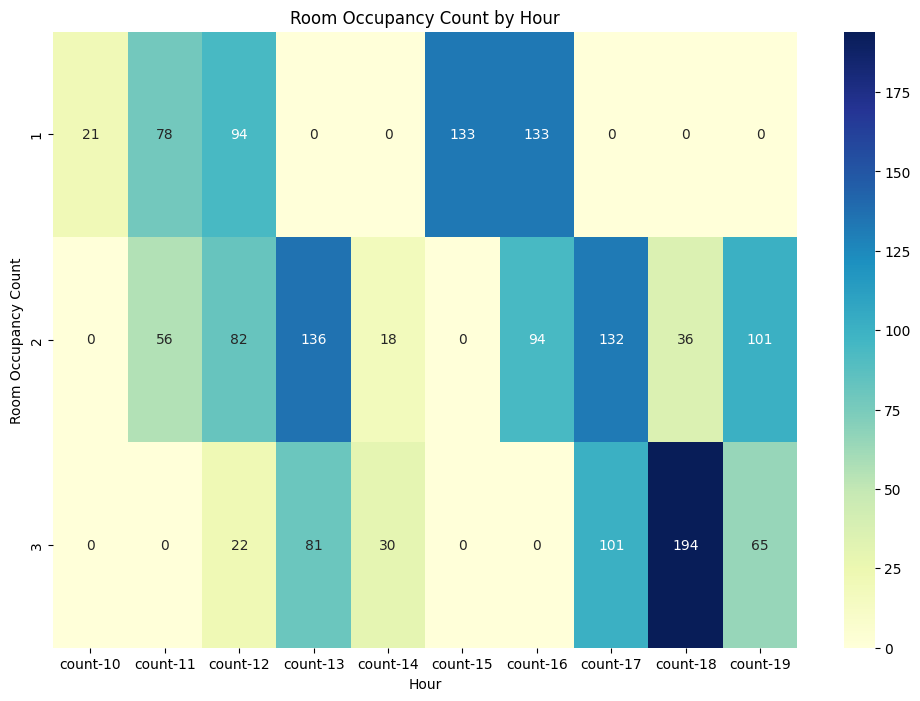

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_hour, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Room Occupancy Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Room Occupancy Count')
plt.show()

In [ ]:
# Occupancy Rates
not_zero = len(df[df['room_occupancy_count'] > 0])
zero = len(df[df['room_occupancy_count'] < 1])

occupancy_rates = not_zero / (not_zero + zero)
ocup_percentage = occupancy_rates * 100
ocup_percentage = round(ocup_percentage,2)
ocup_percentage

19.88

In [ ]:
print(f"Based on our data, we know that our occupancy rates is {ocup_percentage}%")

Based on our data, we know that our occupancy rates is 19.88%


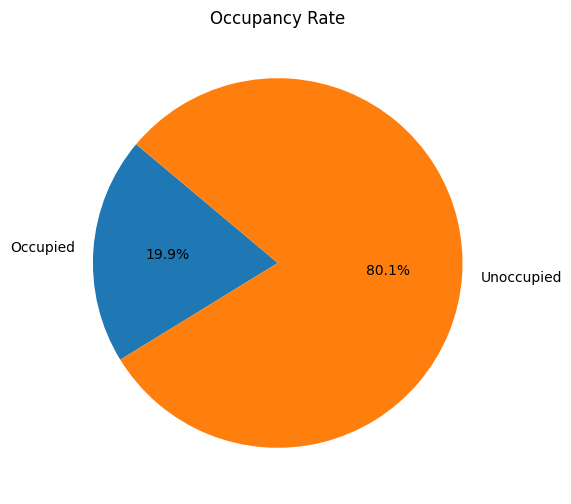

In [ ]:
import matplotlib.pyplot as plt

# Data
occupancy_ret = [not_zero, zero]
labels = ['Occupied', 'Unoccupied']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(occupancy_ret, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Occupancy Rate')

# Display the chart
plt.show()

# 1.4 Split Train, Val, Test (60:20:20)

In [ ]:
df = df.copy()

In [ ]:
df = df.sample(frac = 1, random_state = 1).reset_index()

In [ ]:
n = len(df)
n

8084

In [ ]:
n_train = int(0.6 * n)
n_val = int(0.2 * n) + 1
n_test = int(0.2 * n) + 1

In [ ]:
n_test

1617

In [ ]:
if n - (n_train + n_val + n_test) == 0:
  print("Yes, the data is correct")
else:
  print("No, the data is incorrect")

Yes, the data is correct


In [ ]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:(n_train + n_val)]
df_test = df.iloc[(n_train + n_val):(n_train + n_val + n_test)]

In [ ]:
df_val = df_val.reset_index()

In [ ]:
df_test = df_test.reset_index()

In [ ]:
# Mutual Information

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4850 non-null   int64         
 1   date                  4850 non-null   datetime64[ns]
 2   time                  4850 non-null   datetime64[ns]
 3   s1_temp               4850 non-null   float64       
 4   s2_temp               4850 non-null   float64       
 5   s3_temp               4850 non-null   float64       
 6   s4_temp               4850 non-null   float64       
 7   s1_light              4850 non-null   int64         
 8   s2_light              4850 non-null   int64         
 9   s3_light              4850 non-null   int64         
 10  s4_light              4850 non-null   int64         
 11  s1_sound              4850 non-null   float64       
 12  s2_sound              4850 non-null   float64       
 13  s3_sound          

# 1.5 Mutual Information

In [ ]:
df_train.describe()

,index,s1_temp,s2_temp,s3_temp,s4_temp,s1_light,s2_light,s3_light,s4_light,s1_sound,s2_sound,s3_sound,s4_sound,s5_co2,s5_co2_slope,s6_pir,s7_pir,room_occupancy_count
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,4037.056289,25.481569,25.580035,25.080171,25.835751,29.754021,28.684330,40.096701,15.269485,0.183748,0.124740,0.175909,0.107394,471.023711,-0.002115,0.095876,0.075876,0.404124
std,2318.691208,0.366580,0.623462,0.434885,0.334512,53.894360,69.616594,62.395613,20.845268,0.348820,0.284158,0.460567,0.145429,211.943638,1.229809,0.294452,0.264827,0.878458
min,1.000000,24.940000,24.750000,24.440000,25.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.050000,0.050000,350.000000,-6.296154,0.000000,0.000000,0.000000
25%,2024.250000,25.190000,25.190000,24.750000,25.560000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,4066.000000,25.380000,25.380000,25.000000,25.810000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.070000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,6040.750000,25.690000,25.690000,25.380000,26.130000,15.000000,19.000000,60.000000,27.000000,0.080000,0.060000,0.070000,0.100000,485.000000,0.026923,0.000000,0.000000,0.000000
max,8083.000000,26.380000,29.000000,26.190000,26.560000,165.000000,258.000000,280.000000,74.000000,3.840000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
X = df_train.drop(['room_occupancy_count','date','index','time','hour'], axis = 1)
y = df_train['room_occupancy_count']

In [ ]:
for column in X.columns:
  print((column), X[column].values)

s1_temp [25.94 26.   25.06 ... 25.19 25.13 25.44]
s2_temp [26.75 27.   25.06 ... 25.25 25.13 25.44]
s3_temp [25.5  25.44 24.56 ... 24.63 24.81 25.25]
s4_temp [26.38 26.25 25.19 ... 25.56 25.69 26.06]
s1_light [120 161   5 ...   0  10   0]
s2_light [ 25 249   5 ...   0  11   0]
s3_light [45 84 29 ...  0 50  0]
s4_light [34 62 20 ...  0 35  0]
s1_sound [0.45 1.13 0.08 ... 0.06 0.08 0.08]
s2_sound [0.06 1.75 0.05 ... 0.05 0.05 0.05]
s3_sound [0.14 0.68 0.06 ... 0.06 0.06 0.06]
s4_sound [0.1  0.53 0.1  ... 0.06 0.05 0.1 ]
s5_co2 [425 580 350 ... 360 360 350]
s5_co2_slope [0.59615385 2.44615385 0.         ... 0.01923077 0.13846154 0.        ]
s6_pir [1 1 0 ... 0 0 0]
s7_pir [0 0 0 ... 0 0 0]


In [ ]:
"""With this one, we create a function to know values for each column"""
def values_list(df):
  list_abc = []
  for column in df.columns:
    abc = df[column].values
    list_abc.append(abc)

  return list_abc

In [ ]:
value_x = values_list(X)

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
value_x

[array([25.94, 26.  , 25.06, ..., 25.19, 25.13, 25.44]),
 array([26.75, 27.  , 25.06, ..., 25.25, 25.13, 25.44]),
 array([25.5 , 25.44, 24.56, ..., 24.63, 24.81, 25.25]),
 array([26.38, 26.25, 25.19, ..., 25.56, 25.69, 26.06]),
 array([120, 161,   5, ...,   0,  10,   0]),
 array([ 25, 249,   5, ...,   0,  11,   0]),
 array([45, 84, 29, ...,  0, 50,  0]),
 array([34, 62, 20, ...,  0, 35,  0]),
 array([0.45, 1.13, 0.08, ..., 0.06, 0.08, 0.08]),
 array([0.06, 1.75, 0.05, ..., 0.05, 0.05, 0.05]),
 array([0.14, 0.68, 0.06, ..., 0.06, 0.06, 0.06]),
 array([0.1 , 0.53, 0.1 , ..., 0.06, 0.05, 0.1 ]),
 array([425, 580, 350, ..., 360, 360, 350]),
 array([0.59615385, 2.44615385, 0.        , ..., 0.01923077, 0.13846154,
        0.        ]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [ ]:
y_list = y.tolist()

In [ ]:
"""With this function we want to know the mutual score for each column"""
def mutual_info(values_x,y):
  mutual_info_scores = []
  for x in value_x:
    mi_score = mutual_info_score(x, y)
    mutual_info_scores.append(mi_score)

  return mutual_info_scores

In [ ]:
mutual_score = mutual_info(value_x, y_list)

In [ ]:
column_name = []
for column in X.columns:
  column_name.append(column)

In [ ]:
column_score = []
for i, (column, score) in enumerate(zip(column_name, mutual_score)):
  column_score.append([i, column, score])

In [ ]:
column_score_df = pd.DataFrame(column_score)

In [ ]:
column_score_df.rename(columns = {0:'index',1:'column',2:'mi_score'}, inplace = True)

In [ ]:
"""We assign the result of our mutual information for each column (not include target) into DataFrame, for better understanding"""
column_score_df = column_score_df[['column','mi_score']]
column_score_df = column_score_df.sort_values('mi_score', ascending = False)
column_score_df

,column,mi_score
4,s1_light,0.657416
13,s5_co2_slope,0.601882
5,s2_light,0.595803
6,s3_light,0.486848
7,s4_light,0.429502
12,s5_co2,0.420030
8,s1_sound,0.408462
1,s2_temp,0.399434
10,s3_sound,0.372001
9,s2_sound,0.369914


In [ ]:
"""Because we gonna plot image repetitively, we create function to ease our process"""
def plot_img(x, y, title, color, plot_type):
  plt.figure(figsize=(10,8))
  if plot_type == 'barh':
    plt.barh(x, y, color=color)
    for i, v in enumerate(y):
            plt.text(v, i, f'{v:.3f}', va='center', fontsize=12, color='black')
  elif plot_type == 'bar':
    plt.bar(x, y, color=color)
    for i, v in enumerate(y):
            plt.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12, color='black')
  elif plot_type == 'line':
    plt.plot(x, y, color=color)
  elif plot_type == 'scatter':
    plt.scatter(x, y, color=color)
  plt.title(title)
  plt.show()

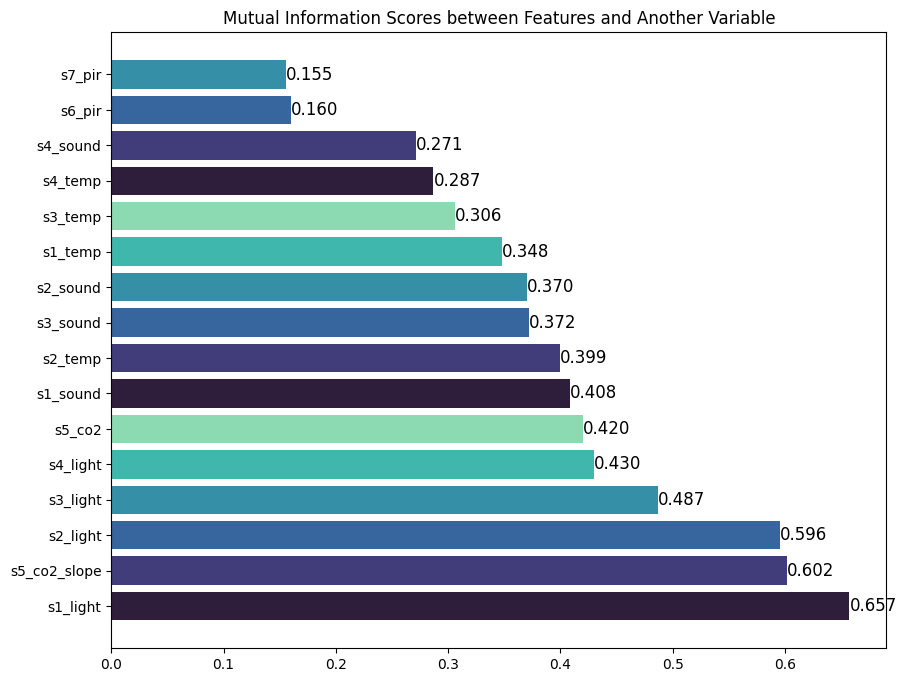

In [ ]:
x = column_score_df['column']
y = column_score_df['mi_score']

color = sns.color_palette('mako')
title = ('Mutual Information Scores between Features and Another Variable')
plot_img(x, y, title=title, color=color, plot_type='barh')

# 1.6 Correlation

In [ ]:
"""With this function we want to know the correlation score(linear) between features(column) and target"""
def correlation_coef(x,y, df):
  list_corr = []
  for x in X:
    corr_coef = df[x].corr(df[y])
    list_corr.append(corr_coef)

  return list_corr

In [ ]:
list_corr = []
for column in X.columns:
    correlation = X[column].corr(df_train['room_occupancy_count'])
    list_corr.append((column, correlation))
    # change to df
    df_corr = pd.DataFrame(list_corr)


In [ ]:
df_corr = df_corr.sort_values(1, ascending = False)
df_corr

,0,1
4,s1_light,0.943278
6,s3_light,0.871400
5,s2_light,0.864282
0,s1_temp,0.729814
12,s5_co2,0.699929
1,s2_temp,0.680455
15,s7_pir,0.671308
2,s3_temp,0.642982
14,s6_pir,0.620352
8,s1_sound,0.609189


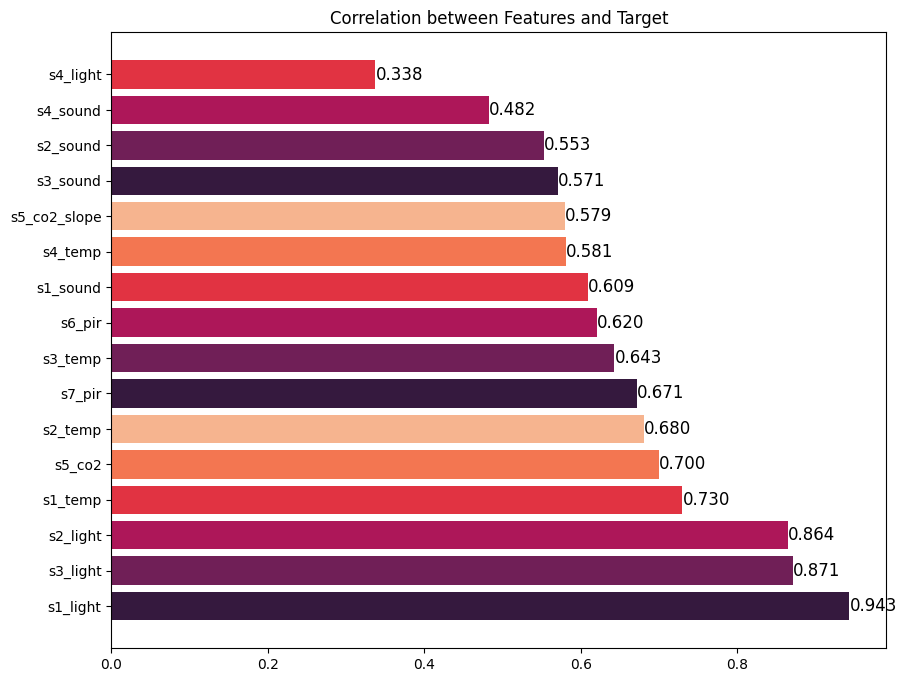

In [ ]:
x = df_corr[0]
y = df_corr[1]
title = 'Correlation between Features and Target'
color = sns.color_palette('rocket')
plot_img(x, y, title, color=color, plot_type = 'barh')

Below, we take each top 5 from mutual information and correlation

In [ ]:
df_corr_head = df_corr.head()
df_corr_head

,0,1
4,s1_light,0.943278
6,s3_light,0.871400
5,s2_light,0.864282
0,s1_temp,0.729814
12,s5_co2,0.699929


In [ ]:
cs_head = column_score_df.head()
cs_head

,column,mi_score
4,s1_light,0.657416
13,s5_co2_slope,0.601882
5,s2_light,0.595803
6,s3_light,0.486848
7,s4_light,0.429502


we assign them to new variable called `important`, we want to visualize the distribution of this column

In [ ]:
important = ['s1_light','s2_light','s3_light','s4_light','s1_temp','s5_co2','s5_co2_slope']

In [ ]:
df_important = df_train[important]

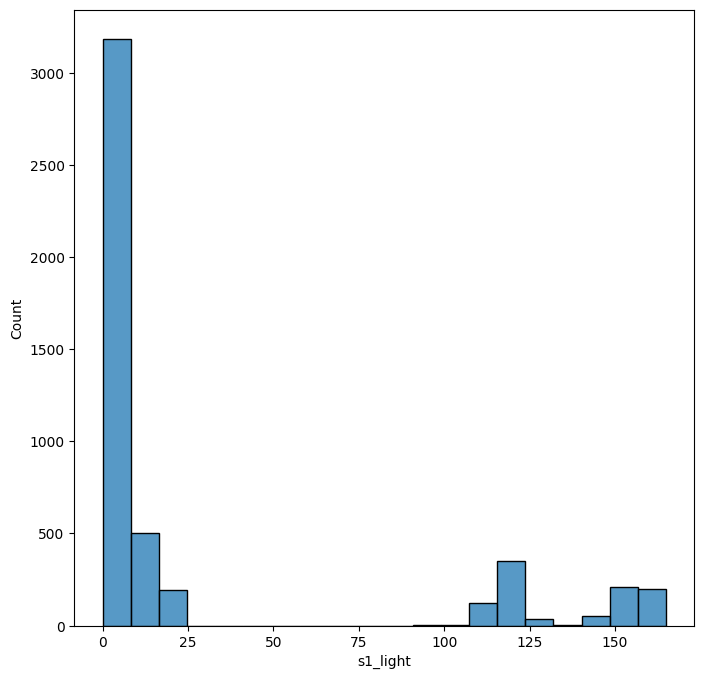

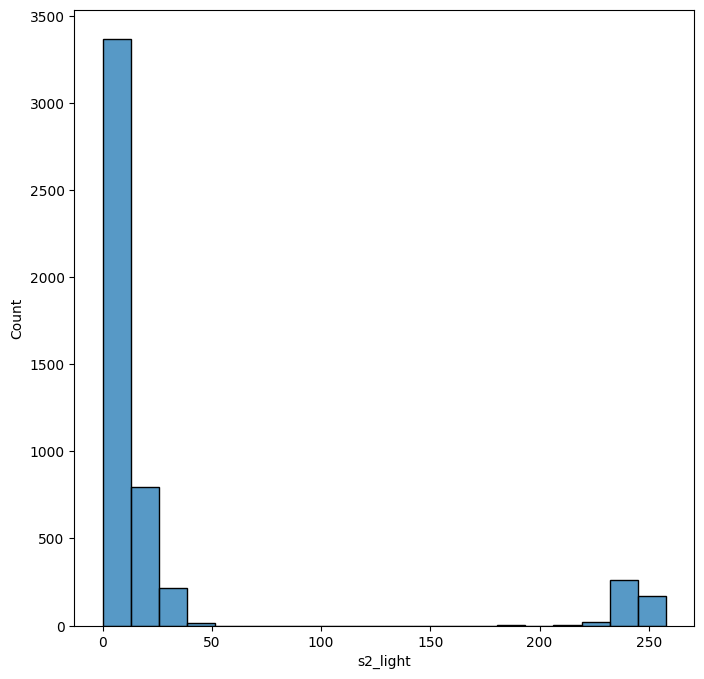

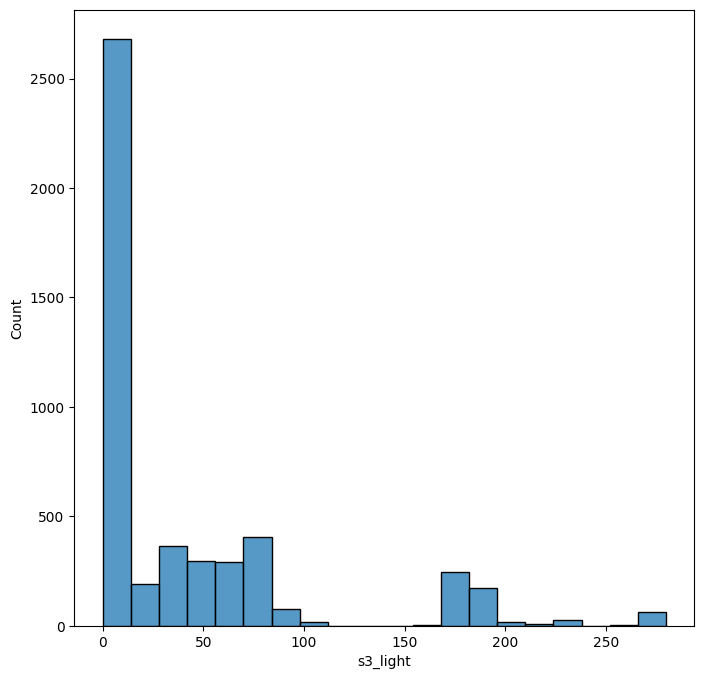

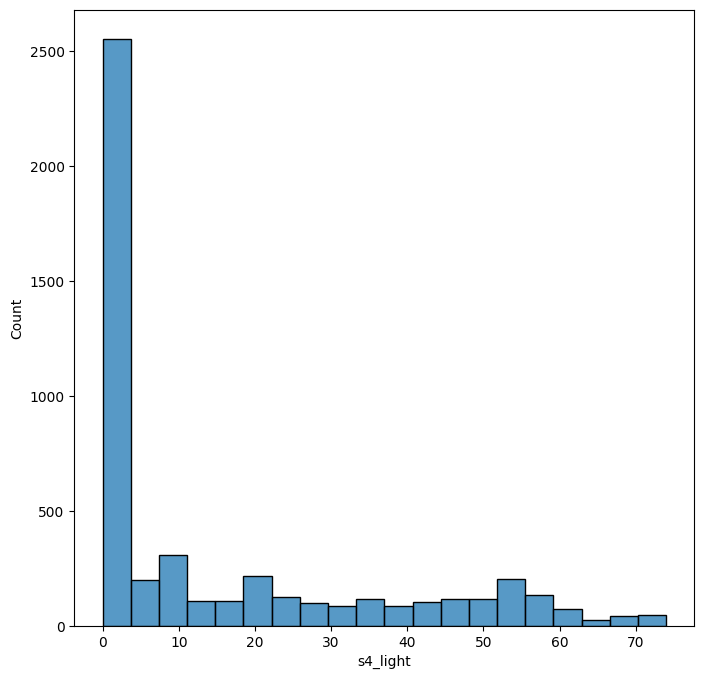

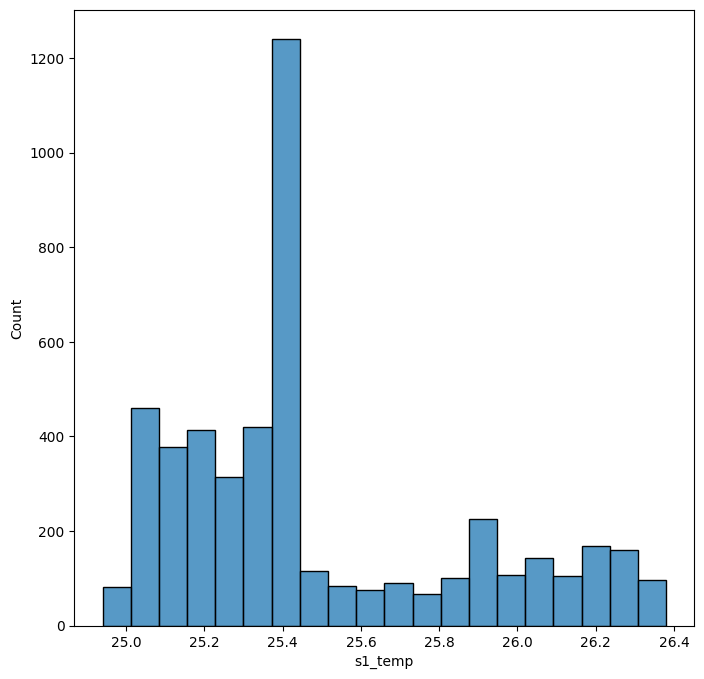

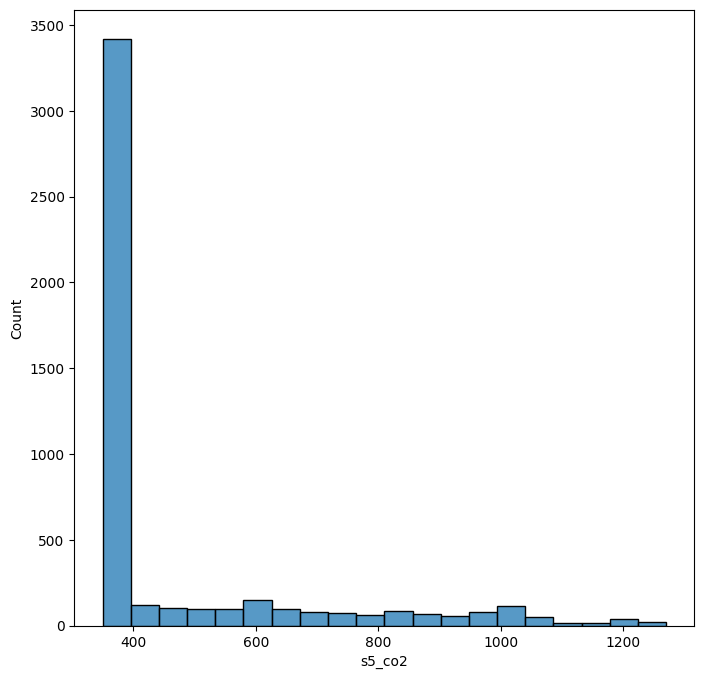

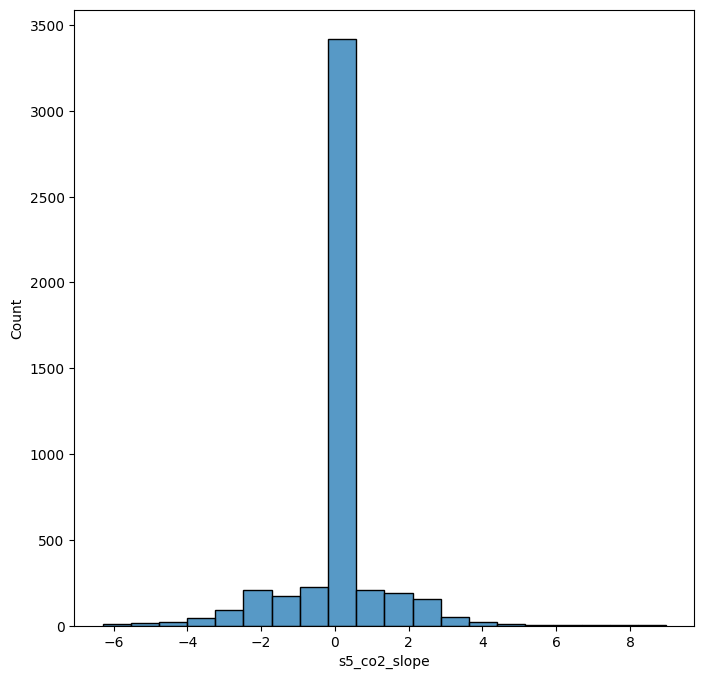

In [ ]:
for col in df_important:
  plt.figure(figsize=(8,8))
  sns.histplot(df_important[col], bins = 20)

based on the plot above, we can clearly said that almost all our plot is skewed, only one features have plot that almost similiar to gaussian distribution (`s5_co2_slope`)

## 1.61 Below, we prepare X_train, X_val, X_test and their corresponding (y / target) for modelling

In [ ]:
X_val = df_val.copy()

In [ ]:
X_val.columns

Index(['level_0', 'index', 'date', 'time', 's1_temp', 's2_temp', 's3_temp',
       's4_temp', 's1_light', 's2_light', 's3_light', 's4_light', 's1_sound',
       's2_sound', 's3_sound', 's4_sound', 's5_co2', 's5_co2_slope', 's6_pir',
       's7_pir', 'room_occupancy_count', 'hour'],
      dtype='object')

In [ ]:
X_val.drop(columns = ['level_0','index','date','time','room_occupancy_count'], inplace=True)

In [ ]:
y_val = df_val['room_occupancy_count']

In [ ]:
X_test = df_test.copy()

In [ ]:
X_test.drop(columns = ['level_0','index','date','time','room_occupancy_count'], inplace=True)

In [ ]:
y_test = df_test['room_occupancy_count']

# 1.7 Dict Vectorizer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [ ]:
train_dicts = X.to_dict(orient = 'records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [ ]:
y_train = df_train['room_occupancy_count']

In [ ]:
dv.get_feature_names_out()

array(['s1_light', 's1_sound', 's1_temp', 's2_light', 's2_sound',
       's2_temp', 's3_light', 's3_sound', 's3_temp', 's4_light',
       's4_sound', 's4_temp', 's5_co2', 's5_co2_slope', 's6_pir',
       's7_pir'], dtype=object)

try the model with some random number of max_depth (below, we use 3 as initial)

# 1.8 Modeling

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.31274181067835954,
                                     1: 4.239510489510489,
                                     2: 3.1330749354005167,
                                     3: 4.041666666666667},
                       max_depth=3)

In [ ]:
y_pred_train = dt.predict_proba(X_train)

In [ ]:
roc_auc_scores = []
for i in range(len(np.unique(y_train))):
    roc_auc = roc_auc_score((y_train == i).astype(int), y_pred_train[:, i])
    roc_auc_scores.append(roc_auc)

# Print or use the individual ROC AUC scores as needed
print("ROC AUC Scores for Each Class:", roc_auc_scores)

# If you want macro-average ROC AUC, you can calculate it as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
print("Macro-Average ROC AUC:", macro_avg_roc_auc)

ROC AUC Scores for Each Class: [1.0, 0.9966904261382789, 0.9877178477530728, 0.9832428571428571]
Macro-Average ROC AUC: 0.9919127827585521


In [ ]:
val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_val), y = y_val)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.312403400309119, 1: 4.2109375,
                                     2: 2.8875, 3: 4.646551724137931},
                       max_depth=3)

In [ ]:
y_pred_val = dt.predict_proba(X_val)

In [ ]:
roc_auc_scores = []
for i in range(len(np.unique(y_val))):
    roc_auc = roc_auc_score((y_val == i).astype(int), y_pred_val[:, i])
    roc_auc_scores.append(roc_auc)

# Print or use the individual ROC AUC scores as needed
print("ROC AUC Scores for Each Class:", roc_auc_scores)

# If you want macro-average ROC AUC, you can calculate it as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
print("Macro-Average ROC AUC:", macro_avg_roc_auc)

ROC AUC Scores for Each Class: [1.0, 0.9982947074293229, 0.98846600251475, 0.9816993464052288]
Macro-Average ROC AUC: 0.9921150140873254


In [ ]:
test_dicts = X_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_test), y = y_test)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.30953292496171514, 1: 5.25,
                                     2: 3.158203125, 3: 3.813679245283019},
                       max_depth=3)

In [ ]:
y_pred_test = dt.predict_proba(X_test)

In [ ]:
y_pred_test[:, i]

array([0.       , 0.       , 0.       , ..., 0.       , 0.7313576,
       0.       ])

In [ ]:
roc_auc_scores = []
for i in range(len(np.unique(y_test))):
    roc_auc = roc_auc_score((y_test == i).astype(int), y_pred_test[:, i])
    roc_auc_scores.append(roc_auc)

# Print or use the individual ROC AUC scores as needed
print("ROC AUC Scores for Each Class:", roc_auc_scores)

# If you want macro-average ROC AUC, you can calculate it as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
print("Macro-Average ROC AUC:", macro_avg_roc_auc)

ROC AUC Scores for Each Class: [0.9983922829581994, 0.9823326024624726, 0.9857601578240429, 0.9832829689197458]
Macro-Average ROC AUC: 0.9874420030411152


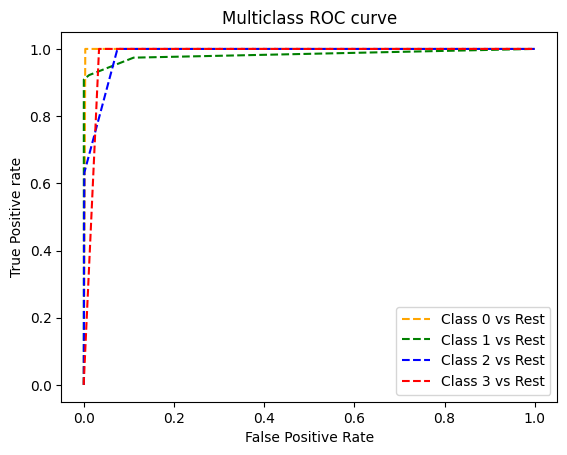

In [ ]:
fpr = {}
tpr = {}
thresh = {}

n_class = len(y_test.unique())

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_test[:, i], pos_label = i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
dt

DecisionTreeClassifier(class_weight={0: 0.30953292496171514, 1: 5.25,
                                     2: 3.158203125, 3: 3.813679245283019},
                       max_depth=3)

In [ ]:
feature_names = list(dv.get_feature_names_out())

In [ ]:
type(feature_names)

list

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=feature_names)

In [ ]:
print(tree_rules)

|--- s1_light <= 96.00
|   |--- s5_co2 <= 1262.50
|   |   |--- s2_temp <= 25.03
|   |   |   |--- class: 0
|   |   |--- s2_temp >  25.03
|   |   |   |--- class: 0
|   |--- s5_co2 >  1262.50
|   |   |--- class: 3
|--- s1_light >  96.00
|   |--- s3_light <= 74.50
|   |   |--- s2_light <= 111.50
|   |   |   |--- class: 1
|   |   |--- s2_light >  111.50
|   |   |   |--- class: 2
|   |--- s3_light >  74.50
|   |   |--- s2_light <= 31.00
|   |   |   |--- class: 2
|   |   |--- s2_light >  31.00
|   |   |   |--- class: 3



# 1.9 Decision Tree Parameter Tuning

In [ ]:
# selecting best max depth
# selecting min sample leaf


In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
labels = y_val.unique()

In [ ]:
y_train.unique()

array([1, 2, 0, 3])

In [ ]:
for d in [1,2,3,4,5,6,7,6,10,15,20,None]:
  class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_val), y = y_val)
  dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = d)
  dt.fit(X_train, y_train)
  y_pred = dt.predict_proba(X_val)
  auc = roc_auc_score(y_val, y_pred, multi_class = 'ovr', average='macro')

  # f1
  y_pred_labels = y_pred.argmax(axis=1)
  f1 = f1_score(y_val, y_pred_labels, average = 'macro')

  # recall
  recall = recall_score(y_val, y_pred_labels, average = 'macro')

  print('max_depth=%4s -> ROC AUC: %.3f, F1 Score (macro): %.3f, Recall: %.3f' % (d, auc, f1, recall))

max_depth=   1 -> ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   2 -> ROC AUC: 0.979, F1 Score (macro): 0.623, Recall: 0.742
max_depth=   3 -> ROC AUC: 0.992, F1 Score (macro): 0.877, Recall: 0.898
max_depth=   4 -> ROC AUC: 0.999, F1 Score (macro): 0.980, Recall: 0.981
max_depth=   5 -> ROC AUC: 0.997, F1 Score (macro): 0.982, Recall: 0.986
max_depth=   6 -> ROC AUC: 0.994, F1 Score (macro): 0.977, Recall: 0.980
max_depth=   7 -> ROC AUC: 0.998, F1 Score (macro): 0.984, Recall: 0.986
max_depth=   6 -> ROC AUC: 0.994, F1 Score (macro): 0.977, Recall: 0.980
max_depth=  10 -> ROC AUC: 0.995, F1 Score (macro): 0.979, Recall: 0.982
max_depth=  15 -> ROC AUC: 0.987, F1 Score (macro): 0.975, Recall: 0.976
max_depth=  20 -> ROC AUC: 0.991, F1 Score (macro): 0.981, Recall: 0.982
max_depth=None -> ROC AUC: 0.989, F1 Score (macro): 0.979, Recall: 0.980


In [ ]:
y_pred_labels = y_pred.argmax(axis=1)

In [ ]:
y_pred_labels

array([0, 2, 0, ..., 0, 0, 0])

In [ ]:
results_df = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'ROC AUC', 'F1 Score (macro)', 'Recall'])

for d in [1,2,3,4,5,6,7,10,15,20,None]:
  for s in [1,2,5,10,15,20,100,200]:
    class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_val), y = y_val)
    dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = d, min_samples_leaf = s)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred, multi_class = 'ovr', average='macro')

    # f1
    y_pred_labels = y_pred.argmax(axis=1)
    f1 = f1_score(y_val, y_pred_labels, average = 'macro')

    # recall
    recall = recall_score(y_val, y_pred_labels, average = 'macro')

    print('max_depth=%4s -> min_sample_leaf = %4s, ROC AUC: %.3f, F1 Score (macro): %.3f, Recall: %.3f' % (d, s, auc, f1, recall))
    results_df = results_df.append({
            'max_depth': d,
            'min_samples_leaf': s,
            'ROC AUC': auc,
            'F1 Score (macro)': f1,
            'Recall': recall
        }, ignore_index=True)


max_depth=   1 -> min_sample_leaf =    1, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =    2, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =    5, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =   10, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =   15, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =   20, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =  100, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   1 -> min_sample_leaf =  200, ROC AUC: 0.947, F1 Score (macro): 0.356, Recall: 0.500
max_depth=   2 -> min_sample_leaf =    1, ROC AUC: 0.979, F1 Score (macro): 0.623, Recall: 0.742
max_depth=   2 -> min_sample_leaf =    2, ROC AUC: 0.979, F1 Score (macro): 0.623, Recall: 0.742
max_depth=   2 -> min_sample_l

In [ ]:
results_df.sort_values('ROC AUC', ascending = False)

,max_depth,min_samples_leaf,ROC AUC,F1 Score (macro),Recall
53,7.0,20.0,0.999847,0.968509,0.975
85,NaN,20.0,0.999847,0.968509,0.975
61,10.0,20.0,0.999847,0.968509,0.975
77,20.0,20.0,0.999847,0.968509,0.975
69,15.0,20.0,0.999847,0.968509,0.975
...,...,...,...,...,...
5,1.0,20.0,0.946576,0.356098,0.500
4,1.0,15.0,0.946576,0.356098,0.500
3,1.0,10.0,0.946576,0.356098,0.500
2,1.0,5.0,0.946576,0.356098,0.500


In [ ]:
results_df_mean = results_df.groupby(['max_depth', 'min_samples_leaf'])['ROC AUC'].mean().reset_index()

In [ ]:
results_df_mean

,max_depth,min_samples_leaf,ROC AUC
0,1.0,1.0,0.946576
1,1.0,2.0,0.946576
2,1.0,5.0,0.946576
3,1.0,10.0,0.946576
4,1.0,15.0,0.946576
...,...,...,...
75,20.0,10.0,0.997939
76,20.0,15.0,0.997944
77,20.0,20.0,0.999847
78,20.0,100.0,0.999025


In [ ]:
df_scores = results_df_mean.pivot(index = 'min_samples_leaf', columns = ['max_depth'], values = ['ROC AUC'])
df_scores.round(3)

ROC AUC                                                   \
max_depth           1.0    2.0    3.0    4.0    5.0    6.0    7.0    10.0   
min_samples_leaf                                                            
1.0                0.947  0.979  0.992  0.999  0.997  0.996  0.997  0.997   
2.0                0.947  0.979  0.992  0.999  0.999  0.998  0.998  0.994   
5.0                0.947  0.978  0.992  0.999  0.999  1.000  1.000  0.997   
10.0               0.947  0.978  0.992  0.999  1.000  1.000  0.997  0.998   
15.0               0.947  0.979  0.992  0.999  1.000  1.000  0.999  0.998   
20.0               0.947  0.979  0.992  0.999  1.000  1.000  1.000  1.000   
100.0              0.947  0.979  0.991  0.998  0.999  0.999  0.999  0.999   
200.0              0.947  0.979  0.989  0.996  0.996  0.996  0.996  0.996   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1.0               0.989  0.989  
2.0               0.996  0.989  
5.0               0.997  0.997  
10.0              0.998  0.998  
15.0              0.998  0.998  
20.0              1.000  1.000  
100.0             0.999  0.999  
200.0             0.996  0.996

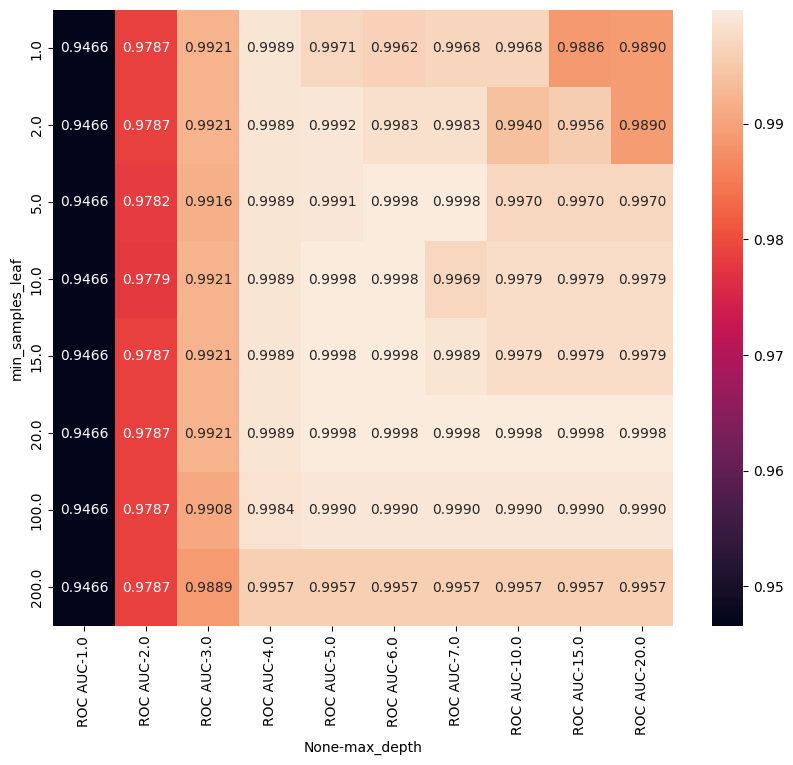

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_scores, annot=True, fmt='.4f')
plt.show()

In [ ]:
# best features is min_samples_leaf = 20, max_depth = 5

In [ ]:
class_weights_val = class_weight.compute_class_weight('balanced', classes = np.unique(y_val), y = y_val)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_val)), max_depth = 5, min_samples_leaf = 20)
dt.fit(X_train, y_train)
y_pred_val = dt.predict_proba(X_val)
auc = roc_auc_score(y_val, y_pred_val, multi_class = 'ovr', average='macro')

# f1
y_pred_labels = y_pred_val.argmax(axis=1)
f1 = f1_score(y_val, y_pred_labels, average = 'macro')

# recall
recall = recall_score(y_val, y_pred_labels, average = 'macro')

# precision
precision = precision_score(y_val, y_pred_labels, average = 'macro')

print('max_depth=%4s -> min_samples_leaf = %4s, ROC AUC: %.3f, F1 Score (macro): %.3f, Recall: %.3f, Precision: %.3f' % (dt.max_depth, dt.min_samples_leaf, auc, f1, recall, precision))


max_depth=   5 -> min_samples_leaf =   20, ROC AUC: 1.000, F1 Score (macro): 0.969, Recall: 0.975, Precision: 0.965


In [ ]:
class_weights_test = class_weight.compute_class_weight('balanced', classes = np.unique(y_test), y = y_test)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_val)), max_depth = 5, min_samples_leaf = 20)
tree_train = dt.fit(X_train, y_train)
y_pred_test = dt.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_test, multi_class='ovr', average='macro')

# f1
y_pred_labels_t = y_pred_test.argmax(axis=1)
f1 = f1_score(y_test, y_pred_labels_t, average='macro')

# recall
recall = recall_score(y_test, y_pred_labels_t, average='macro')
# precision
precision = precision_score(y_test, y_pred_labels_t, average = 'macro')

print('max_depth=%4s -> min_samples_leaf = %4s, ROC AUC: %.3f, F1 Score (macro): %.3f, Recall: %.3f, Precision: %.3f' % (dt.max_depth, dt.min_samples_leaf, auc, f1, recall, precision))


max_depth=   5 -> min_samples_leaf =   20, ROC AUC: 0.996, F1 Score (macro): 0.975, Recall: 0.974, Precision: 0.977


In [ ]:
roc_auc_scores = []
for i in range(len(np.unique(y_test))):
    roc_auc = roc_auc_score((y_test == i).astype(int), y_pred_test[:, i])
    roc_auc_scores.append(roc_auc)

# Print or use the individual ROC AUC scores as needed
print("ROC AUC Scores for Each Class:", roc_auc_scores)

# If you want macro-average ROC AUC, you can calculate it as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
print("Macro-Average ROC AUC:", macro_avg_roc_auc)

ROC AUC Scores for Each Class: [0.9983725865779016, 0.9868232416933717, 0.9993310317327065, 0.9998002072849419]
Macro-Average ROC AUC: 0.9960817668222304


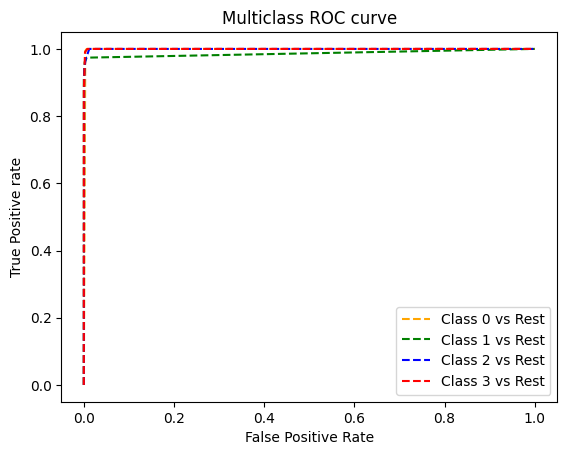

In [ ]:
fpr = {}
tpr = {}
thresh = {}

n_class = len(y_test.unique())

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_test[:, i], pos_label = i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=feature_names)
print(tree_rules)

|--- s1_light <= 96.00
|   |--- s5_co2 <= 1090.00
|   |   |--- s1_temp <= 25.03
|   |   |   |--- class: 0
|   |   |--- s1_temp >  25.03
|   |   |   |--- class: 0
|   |--- s5_co2 >  1090.00
|   |   |--- class: 0
|--- s1_light >  96.00
|   |--- s3_light <= 74.50
|   |   |--- s2_light <= 111.50
|   |   |   |--- s2_sound <= 0.31
|   |   |   |   |--- class: 1
|   |   |   |--- s2_sound >  0.31
|   |   |   |   |--- class: 1
|   |   |--- s2_light >  111.50
|   |   |   |--- s5_co2_slope <= 1.53
|   |   |   |   |--- class: 2
|   |   |   |--- s5_co2_slope >  1.53
|   |   |   |   |--- class: 2
|   |--- s3_light >  74.50
|   |   |--- s2_light <= 31.00
|   |   |   |--- class: 2
|   |   |--- s2_light >  31.00
|   |   |   |--- s3_light <= 123.00
|   |   |   |   |--- s5_co2_slope <= 0.37
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- s5_co2_slope >  0.37
|   |   |   |   |   |--- class: 2
|   |   |   |--- s3_light >  123.00
|   |   |   |   |--- s1_temp <= 26.09
|   |   |   |   |   |--- class: 3


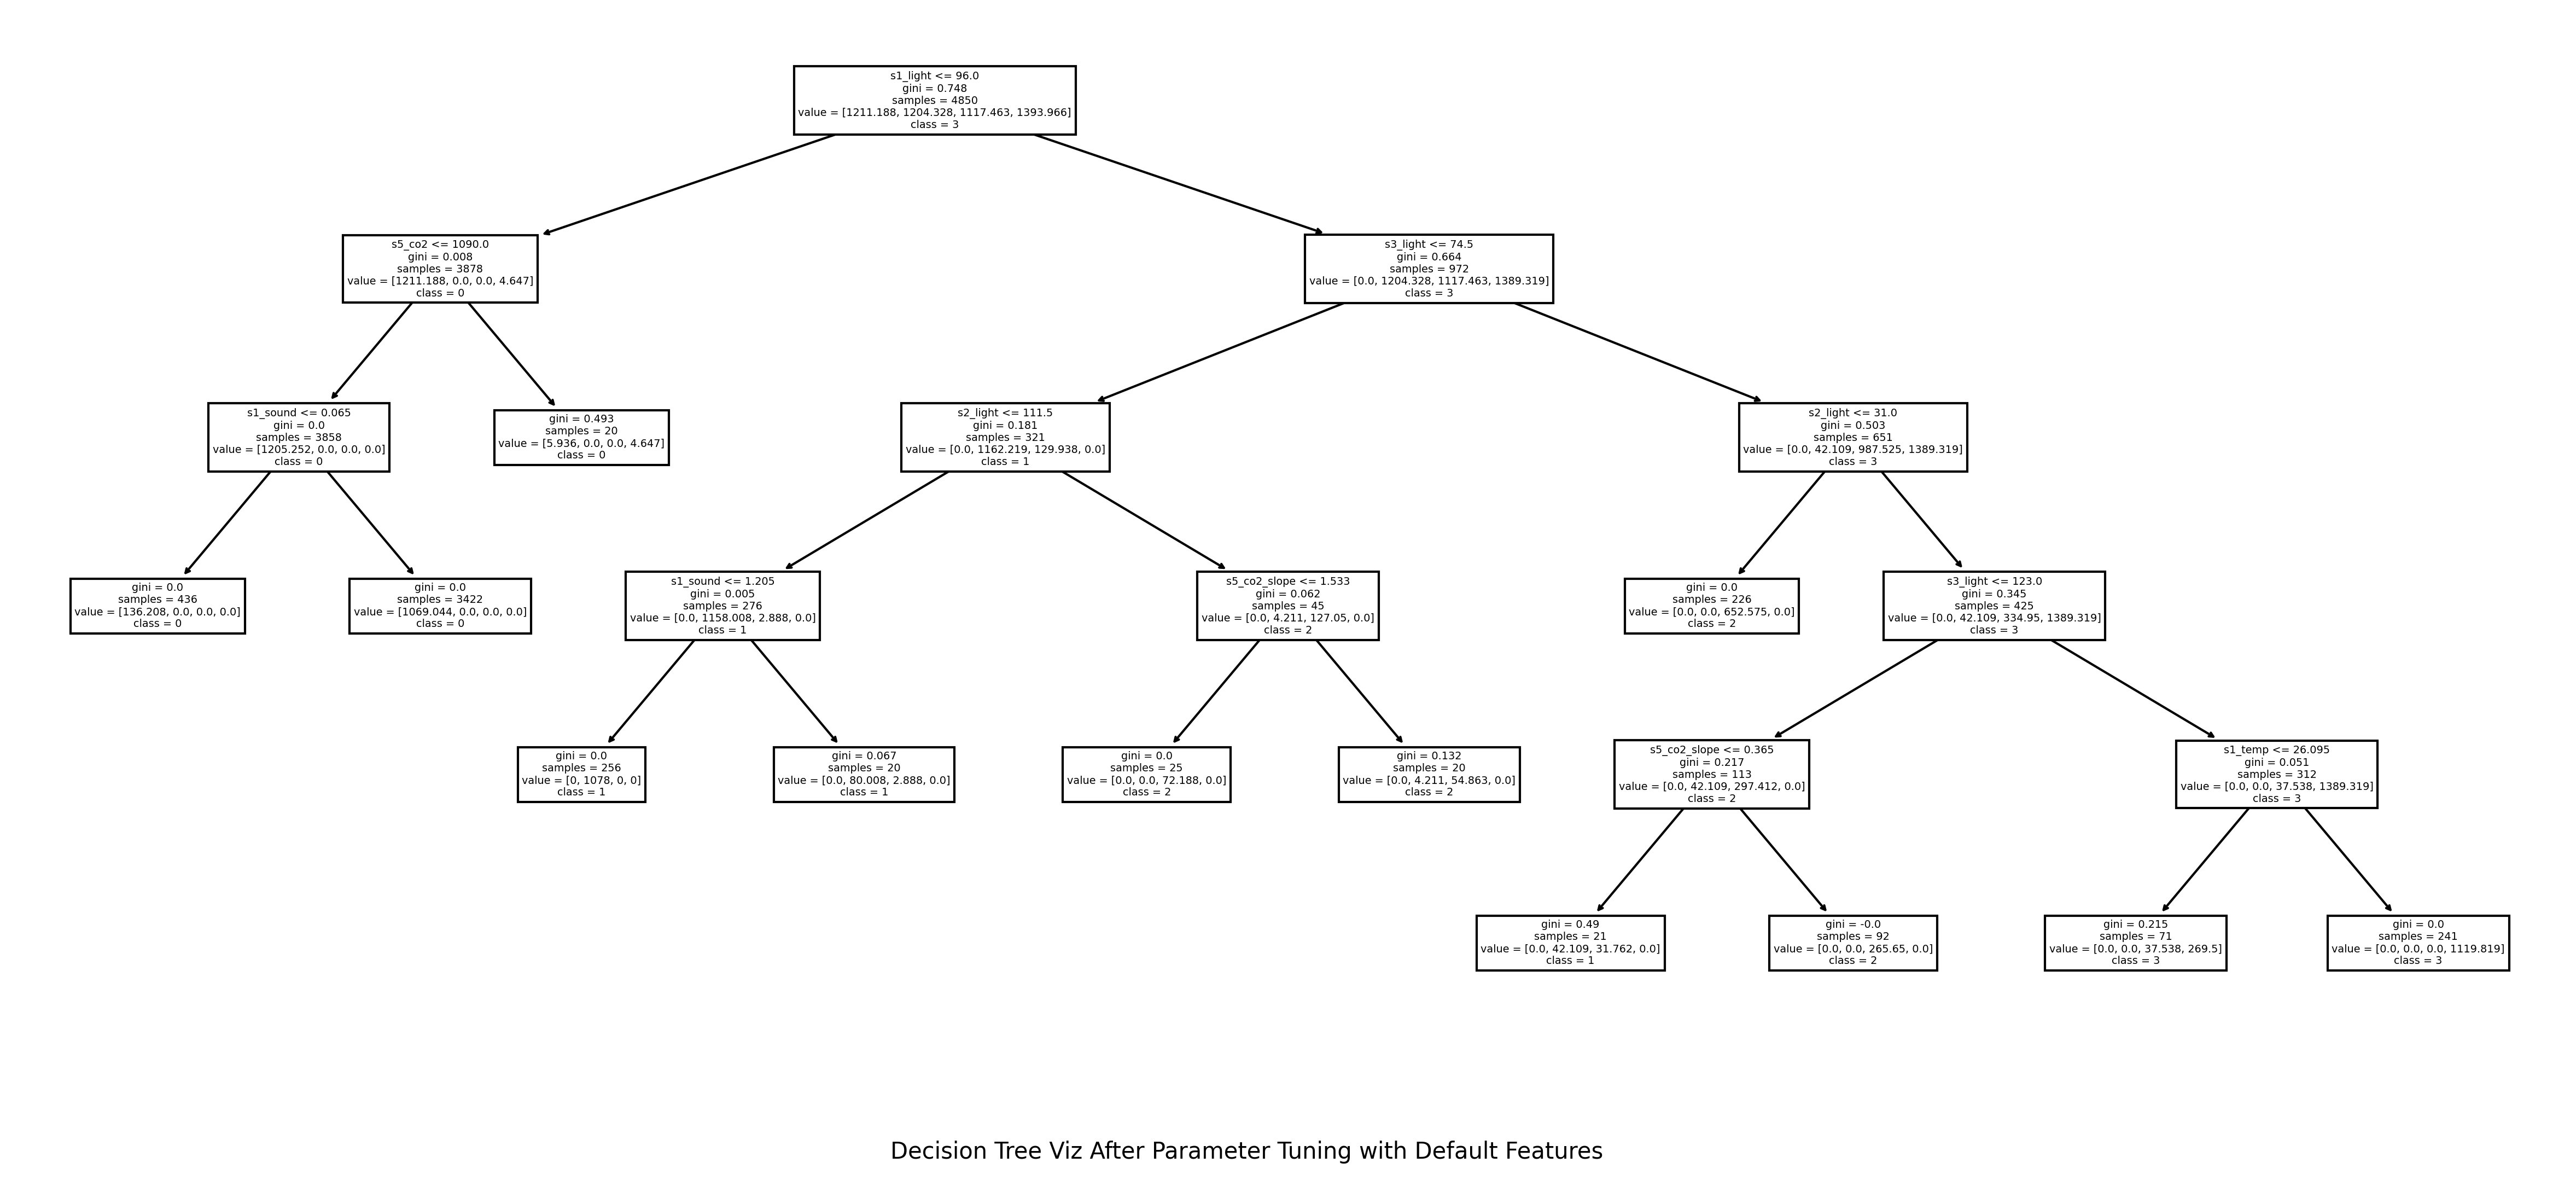

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,8), dpi = 300)
tree.plot_tree(tree_train, feature_names = feature_names, class_names=[str(cls) for cls in tree_train.classes_])

# annotate
plt.figtext(0.5, 0.01, 'Decision Tree Viz After Parameter Tuning with Default Features', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [ ]:
results_df = results_df.append({
            'max_depth': d,
            'min_samples_leaf': s,
            'ROC AUC': auc,
            'F1 Score (macro)': f1,
            'Recall': recall
        }, ignore_index=True)

In [ ]:
input_df = pd.DataFrame(columns= ['features_name', 'min_value','max_value'])

values_min_max = []
for col in X.columns:
  dcba = X[col].min()
  abcd = X[col].max()
  values_min_max.append((col, dcba, abcd))

for col, min_v, max_v in values_min_max:
  input_df = input_df.append({
      'features_name' : col,
      'min_value' : min_v,
      'max_value' : max_v
  }, ignore_index = True)

In [ ]:
input_df

,features_name,min_value,max_value
0,s1_temp,24.940000,26.380000
1,s2_temp,24.750000,29.000000
2,s3_temp,24.440000,26.190000
3,s4_temp,25.000000,26.560000
4,s1_light,0.000000,165.000000
5,s2_light,0.000000,258.000000
6,s3_light,0.000000,280.000000
7,s4_light,0.000000,74.000000
8,s1_sound,0.060000,3.840000
9,s2_sound,0.040000,3.440000


In [ ]:
new_data =[{'s1_temp': 24,
  's2_temp': 23,
  's3_temp': 24,
  's4_temp': 21,
  's1_light': 120,
  's2_light': 20,
  's3_light': 80,
  's4_light': 1,
  's1_sound': 1.2,
  's2_sound': 0.4,
  's3_sound': 0.06,
  's4_sound': 0.1,
  's5_co2': 300,
  's5_co2_slope': -0.10,
  's6_pir': 1,
  's7_pir': 0}]

In [ ]:
X_new = dv.transform(new_data)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
dt.fit(X_train, y_train)
y_pred_new = dt.predict_proba(X_new)

In [ ]:
y_pred_classes = np.argmax(y_pred_new, axis=1)

# result class
print(f"Predicted Occupancy for that data is {y_pred_classes}")

Predicted Occupancy for that data is [2]


In [ ]:
df_cross = df.copy()

In [ ]:
table_occupancy = df_cross['room_occupancy_count'].value_counts()
table_occupancy_df = pd.DataFrame(table_occupancy.reset_index())
table_occupancy_df.rename(columns = {'index' :'class'}, inplace = True)
table_occupancy_df = table_occupancy_df.sort_values('class')
table_occupancy_df

,class,room_occupancy_count
0,0,6477
3,1,459
1,2,655
2,3,493


In [ ]:
df_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8084 entries, 0 to 8083
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 8084 non-null   int64         
 1   date                  8084 non-null   datetime64[ns]
 2   time                  8084 non-null   datetime64[ns]
 3   s1_temp               8084 non-null   float64       
 4   s2_temp               8084 non-null   float64       
 5   s3_temp               8084 non-null   float64       
 6   s4_temp               8084 non-null   float64       
 7   s1_light              8084 non-null   int64         
 8   s2_light              8084 non-null   int64         
 9   s3_light              8084 non-null   int64         
 10  s4_light              8084 non-null   int64         
 11  s1_sound              8084 non-null   float64       
 12  s2_sound              8084 non-null   float64       
 13  s3_sound          

In [ ]:
df_cross_X = df_cross.drop(['room_occupancy_count','date','index','time','hour'], axis = 1)
df_cross_y = df_cross['room_occupancy_count']

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

# Create your decision tree classifier with specified hyperparameters
class_weights_test = class_weight.compute_class_weight('balanced', classes = np.unique(df_cross_y), y = df_cross_y)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_val)), max_depth = 5, min_samples_leaf = 20)

# Define the scoring metrics you want to use for cross-validation
scoring = {
    'Precision': make_scorer(precision_score, average='macro'),
    'F1 Score (macro)': make_scorer(f1_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro')
}

# Perform k-fold cross-validation (e.g., k=5) and get results
cv_results = cross_validate(dt, df_cross_X, df_cross_y, cv=5, scoring=scoring)

# Print the cross-validation results
for metric, scores in scoring.items():
    print(f'{metric}: Mean={cv_results[f"test_{metric}"].mean():.3f}, Std Dev={cv_results[f"test_{metric}"].std():.3f}')


Precision: Mean=0.975, Std Dev=0.006
F1 Score (macro): Mean=0.977, Std Dev=0.005
Recall: Mean=0.979, Std Dev=0.006


# 2.0 Decision Trees Based on Feature Importance

In [129]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 3)
clf = dt.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight={0: 0.31274181067835954,
                                     1: 4.239510489510489,
                                     2: 3.1330749354005167,
                                     3: 4.041666666666667},
                       max_depth=3)

In [130]:
# feature importance
feature_importances = clf.feature_importances_

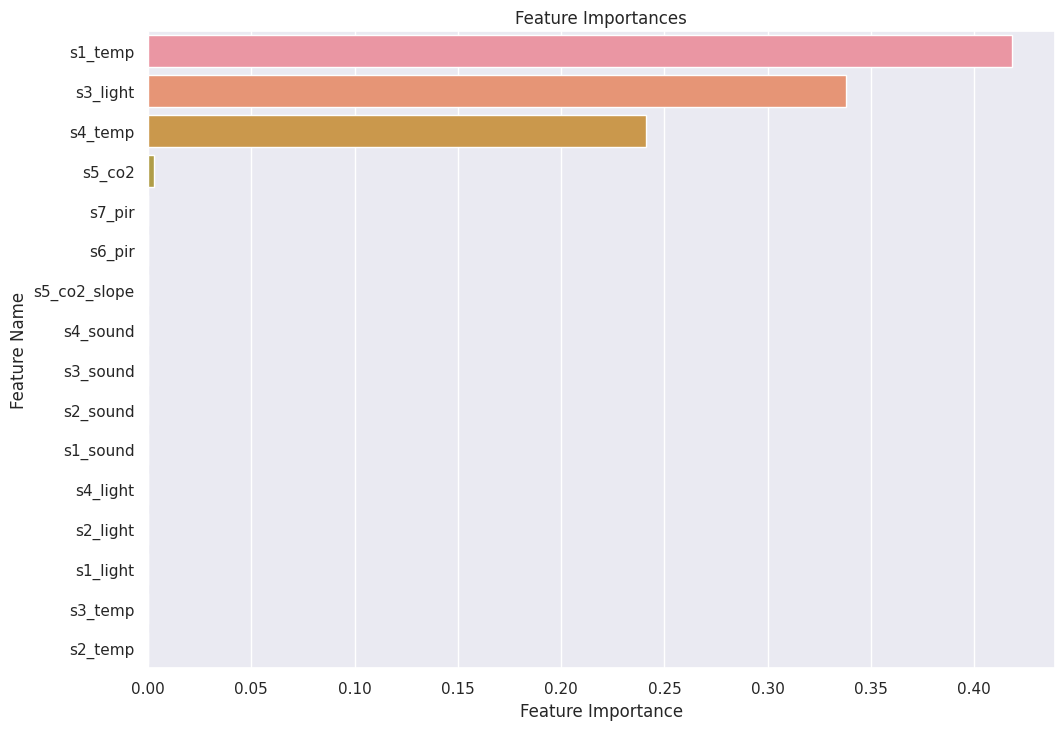

In [131]:
import seaborn as sns

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = sorted_importances, y = sorted_feature_names)

# Show the plot
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()

In [132]:
feature_importance_df = pd.DataFrame({'Feature': sorted_feature_names, 'Importance': sorted_importances})
feature_importance_df

,Feature,Importance
0,s1_temp,0.418080
1,s3_light,0.337801
2,s4_temp,0.241329
3,s5_co2,0.002790
4,s7_pir,0.000000
5,s6_pir,0.000000
6,s5_co2_slope,0.000000
7,s4_sound,0.000000
8,s3_sound,0.000000
9,s2_sound,0.000000


## 2.1 X Importance Train

In [182]:
fi = ['s1_temp','s3_light','s4_temp','s5_co2']

In [183]:
X_important = X[fi]

In [184]:
y_important = y_train.copy()

In [185]:
train_im_dicts = X_important.to_dict(orient = 'records')

In [186]:
dv = DictVectorizer(sparse=False)
X_train_im = dv.fit_transform(train_im_dicts)

In [187]:
dv.get_feature_names_out()

array(['s1_temp', 's3_light', 's4_temp', 's5_co2'], dtype=object)

In [188]:
from sklearn.utils import class_weight

In [189]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_important), y = y_important)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 6, min_samples_leaf = 20)
dt.fit(X_train_im, y_important)

DecisionTreeClassifier(class_weight={0: 0.31274181067835954,
                                     1: 4.239510489510489,
                                     2: 3.1330749354005167,
                                     3: 4.041666666666667},
                       max_depth=6, min_samples_leaf=20)

In [190]:
y_pred_train_im = dt.predict_proba(X_train_im)

In [194]:
type(y_important)

pandas.core.series.Series

In [196]:
from sklearn.metrics import roc_auc_score, precision_score

# Calculate ROC AUC and precision scores for each class
roc_auc_scores = []
precision_scores = []

for i in range(len(np.unique(y_important))):
    # Calculate ROC AUC
    roc_auc = roc_auc_score((y_important == i).astype(int), y_pred_train_im[:, i])
    roc_auc_scores.append(roc_auc)

    # Calculate Precision
    y_true_class = (y_important == i).astype(int)  # True labels for the current class
    y_pred_class = (y_pred_train_im[:, i] >= 0.5).astype(int)  # Predicted labels for the current class
    precision = precision_score(y_true_class, y_pred_class)
    precision_scores.append(precision)

    # Print or use the individual scores as needed
    print(f"Class {i} - ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}")

# If you want macro-average scores, you can calculate them as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
macro_avg_precision = np.mean(precision_scores)

print("\nMacro-Average ROC AUC:", macro_avg_roc_auc)
print("Macro-Average Precision:", macro_avg_precision)


Class 0 - ROC AUC: 0.9967, Precision: 1.0000
Class 1 - ROC AUC: 0.9946, Precision: 0.6914
Class 2 - ROC AUC: 0.9959, Precision: 0.8734
Class 3 - ROC AUC: 0.9988, Precision: 0.8735

Macro-Average ROC AUC: 0.9965029049098633
Macro-Average Precision: 0.8595681123439901


## 2.2 X Importance Val

In [197]:
X_val = df_val.copy()

In [198]:
X_val_im = X_val[fi]

In [199]:
y_val_im = df_val['room_occupancy_count']

In [200]:
val_im_dicts = X_val_im.to_dict(orient = 'records')

In [201]:
dv = DictVectorizer(sparse=False)
X_val_im = dv.fit_transform(val_im_dicts)

In [202]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_val_im), y = y_val_im)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 6, min_samples_leaf = 20)
dt.fit(X_train_im, y_important)

DecisionTreeClassifier(class_weight={0: 0.312403400309119, 1: 4.2109375,
                                     2: 2.8875, 3: 4.646551724137931},
                       max_depth=6, min_samples_leaf=20)

In [203]:
y_pred_val_im = dt.predict_proba(X_val_im)

In [204]:
# Calculate ROC AUC and precision scores for each class
roc_auc_scores = []
precision_scores = []

for i in range(len(np.unique(y_val_im))):
    # Calculate ROC AUC
    roc_auc = roc_auc_score((y_val_im == i).astype(int), y_pred_val_im[:, i])
    roc_auc_scores.append(roc_auc)

    # Calculate Precision
    y_true_class = (y_val_im == i).astype(int)  # True labels for the current class
    y_pred_class = (y_pred_val_im[:, i] >= 0.5).astype(int)  # Predicted labels for the current class
    precision = precision_score(y_true_class, y_pred_class)
    precision_scores.append(precision)

    # Print or use the individual scores as needed
    print(f"Class {i} - ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}")

# If you want macro-average scores, you can calculate them as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
macro_avg_precision = np.mean(precision_scores)

print("\nMacro-Average ROC AUC:", macro_avg_roc_auc)
print("Macro-Average Precision:", macro_avg_precision)


Class 0 - ROC AUC: 0.9976, Precision: 1.0000
Class 1 - ROC AUC: 0.9951, Precision: 0.6714
Class 2 - ROC AUC: 0.9874, Precision: 0.9669
Class 3 - ROC AUC: 0.9970, Precision: 0.8600

Macro-Average ROC AUC: 0.994270879841209
Macro-Average Precision: 0.8745926800472255


## 2.3 X Importance Test

In [205]:
X_test = df_test.copy()

In [206]:
X_test_im = X_test[fi]

In [207]:
y_test_im = df_test['room_occupancy_count']

In [208]:
test_im_dicts = X_test_im.to_dict(orient = 'records')

In [209]:
dv = DictVectorizer(sparse=False)
X_test_im = dv.fit_transform(test_im_dicts)

In [210]:
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_test_im), y = y_test_im)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = 6, min_samples_leaf = 20)
tree_train = dt.fit(X_train_im, y_important)

In [211]:
y_pred_test_im = dt.predict_proba(X_test_im)

In [212]:
# Calculate ROC AUC and precision scores for each class
roc_auc_scores = []
precision_scores = []

for i in range(len(np.unique(y_test_im))):
    # Calculate ROC AUC
    roc_auc = roc_auc_score((y_test_im == i).astype(int), y_pred_test_im[:, i])
    roc_auc_scores.append(roc_auc)

    # Calculate Precision
    y_true_class = (y_test_im == i).astype(int)  # True labels for the current class
    y_pred_class = (y_pred_test_im[:, i] >= 0.5).astype(int)  # Predicted labels for the current class
    precision = precision_score(y_true_class, y_pred_class)
    precision_scores.append(precision)

    # Print or use the individual scores as needed
    print(f"Class {i} - ROC AUC: {roc_auc:.4f}, Precision: {precision:.4f}")

# If you want macro-average scores, you can calculate them as well
macro_avg_roc_auc = np.mean(roc_auc_scores)
macro_avg_precision = np.mean(precision_scores)

print("\nMacro-Average ROC AUC:", macro_avg_roc_auc)
print("Macro-Average Precision:", macro_avg_precision)


Class 0 - ROC AUC: 0.9954, Precision: 1.0000
Class 1 - ROC AUC: 0.9770, Precision: 0.5794
Class 2 - ROC AUC: 0.9900, Precision: 0.8485
Class 3 - ROC AUC: 0.9985, Precision: 0.9060

Macro-Average ROC AUC: 0.9902204127799331
Macro-Average Precision: 0.8334582084582085


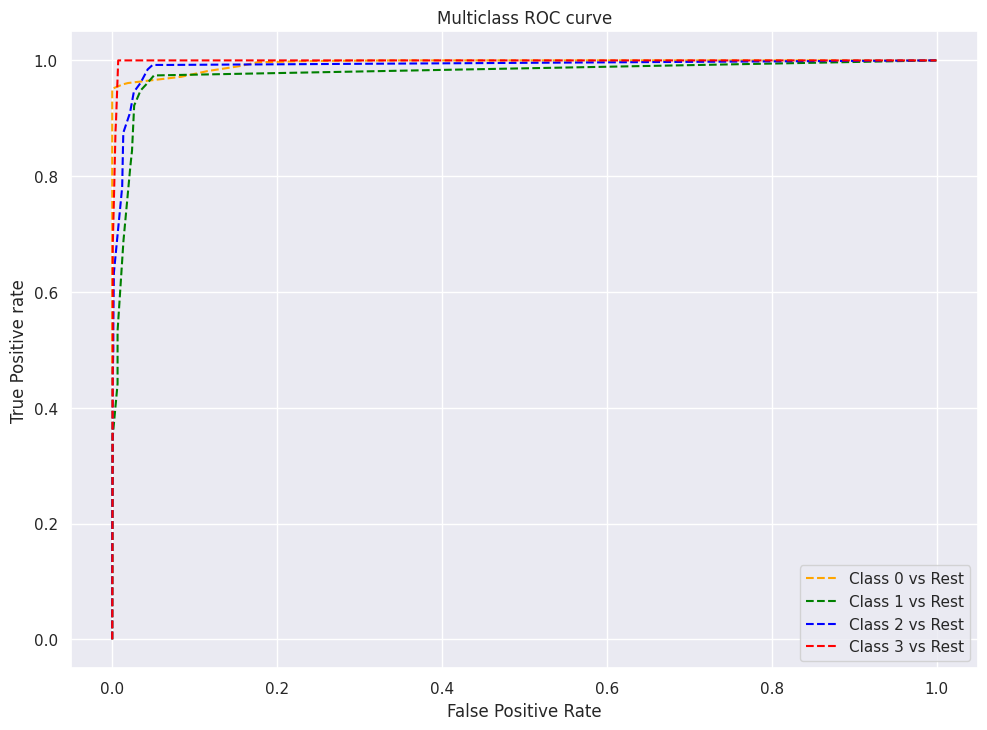

In [159]:
fpr = {}
tpr = {}
thresh = {}

n_class = len(y_test_im.unique())

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_im, y_pred_test_im[:, i], pos_label = i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [160]:
results_df_im = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'ROC AUC', 'F1 Score (macro)', 'Recall'])


for d in [1,2,3,4,5,6,7,10,15,20,None]:
  for s in [1,2,5,10,15,20,100,200]:
    class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_val_im), y = y_val_im)
    dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)), max_depth = d, min_samples_leaf = s)
    dt.fit(X_train_im, y_important)
    y_pred_im = dt.predict_proba(X_val_im)
    auc = roc_auc_score(y_val_im, y_pred_im, multi_class = 'ovr', average='macro')

    # f1
    y_pred_labels = y_pred_im.argmax(axis=1)
    f1 = f1_score(y_val_im, y_pred_labels, average = 'macro')

    # recall
    recall = recall_score(y_val_im, y_pred_labels, average = 'macro')
    results_df_im = results_df_im.append({
            'max_depth': d,
            'min_samples_leaf': s,
            'ROC AUC': auc,
            'F1 Score (macro)': f1,
            'Recall': recall
        }, ignore_index=True)

In [161]:
results_df_im = results_df_im.sort_values('ROC AUC', ascending = False)
results_df_im.head(10)

,max_depth,min_samples_leaf,ROC AUC,F1 Score (macro),Recall
45,6.0,20.0,0.994271,0.898727,0.942732
44,6.0,15.0,0.992961,0.907139,0.942060
36,5.0,15.0,0.992571,0.882712,0.936173
37,5.0,20.0,0.992571,0.882712,0.936173
35,5.0,10.0,0.992483,0.877495,0.937542
43,6.0,10.0,0.992470,0.906684,0.949098
41,6.0,2.0,0.992037,0.907312,0.952791
42,6.0,5.0,0.992001,0.903694,0.948636
34,5.0,5.0,0.991811,0.882129,0.937227
33,5.0,2.0,0.991687,0.883364,0.937420


In [162]:
results_df_mean_im = results_df_im.groupby(['max_depth', 'min_samples_leaf'])['ROC AUC'].mean().reset_index()
results_df_mean_im.sort_values('ROC AUC', ascending = False)

,max_depth,min_samples_leaf,ROC AUC
45,6.0,20.0,0.994271
44,6.0,15.0,0.992961
36,5.0,15.0,0.992571
37,5.0,20.0,0.992571
35,5.0,10.0,0.992483
...,...,...,...
1,1.0,2.0,0.799775
5,1.0,20.0,0.799775
6,1.0,100.0,0.799775
7,1.0,200.0,0.799775


In [163]:
df_scores_im = results_df_mean_im.pivot(index = 'min_samples_leaf', columns = ['max_depth'], values = ['ROC AUC'])
df_scores_im.round(3)

ROC AUC                                                   \
max_depth           1.0    2.0    3.0    4.0    5.0    6.0    7.0    10.0   
min_samples_leaf                                                            
1.0                  0.8  0.929  0.973  0.987  0.990  0.991  0.987  0.976   
2.0                  0.8  0.929  0.973  0.989  0.992  0.992  0.987  0.979   
5.0                  0.8  0.929  0.977  0.989  0.992  0.992  0.990  0.987   
10.0                 0.8  0.929  0.977  0.989  0.992  0.992  0.983  0.983   
15.0                 0.8  0.929  0.977  0.989  0.993  0.993  0.990  0.990   
20.0                 0.8  0.929  0.977  0.989  0.993  0.994  0.991  0.991   
100.0                0.8  0.929  0.977  0.984  0.986  0.986  0.986  0.986   
200.0                0.8  0.929  0.973  0.979  0.979  0.979  0.979  0.979   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1.0               0.970  0.969  
2.0               0.974  0.971  
5.0               0.987  0.987  
10.0              0.983  0.983  
15.0              0.990  0.990  
20.0              0.991  0.991  
100.0             0.986  0.986  
200.0             0.979  0.979

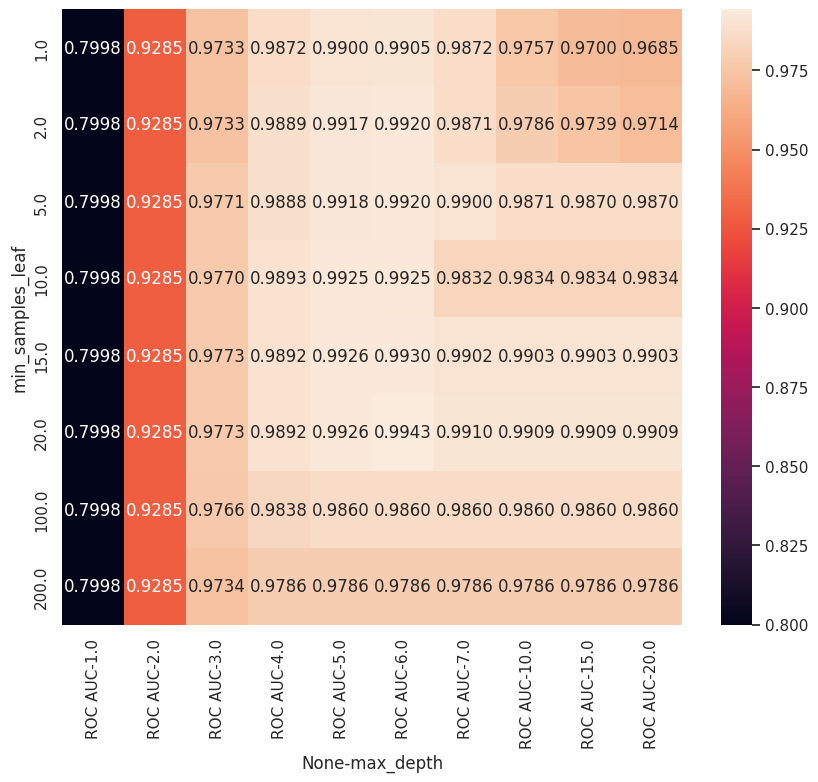

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(df_scores_im, annot=True, fmt='.4f')
plt.show()

In [165]:
feature_names = list(dv.get_feature_names_out())

In [166]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=feature_names)
print(tree_rules)

|--- s3_light <= 76.50
|   |--- s3_light <= 21.50
|   |   |--- s1_temp <= 25.72
|   |   |   |--- class: 0
|   |   |--- s1_temp >  25.72
|   |   |   |--- class: 0
|   |--- s3_light >  21.50
|   |   |--- s5_co2 <= 362.50
|   |   |   |--- s3_light <= 62.50
|   |   |   |   |--- class: 0
|   |   |   |--- s3_light >  62.50
|   |   |   |   |--- class: 1
|   |   |--- s5_co2 >  362.50
|   |   |   |--- s3_light <= 61.50
|   |   |   |   |--- class: 1
|   |   |   |--- s3_light >  61.50
|   |   |   |   |--- class: 1
|--- s3_light >  76.50
|   |--- s5_co2 <= 757.50
|   |   |--- class: 2
|   |--- s5_co2 >  757.50
|   |   |--- s4_temp <= 26.34
|   |   |   |--- class: 3
|   |   |--- s4_temp >  26.34
|   |   |   |--- class: 3



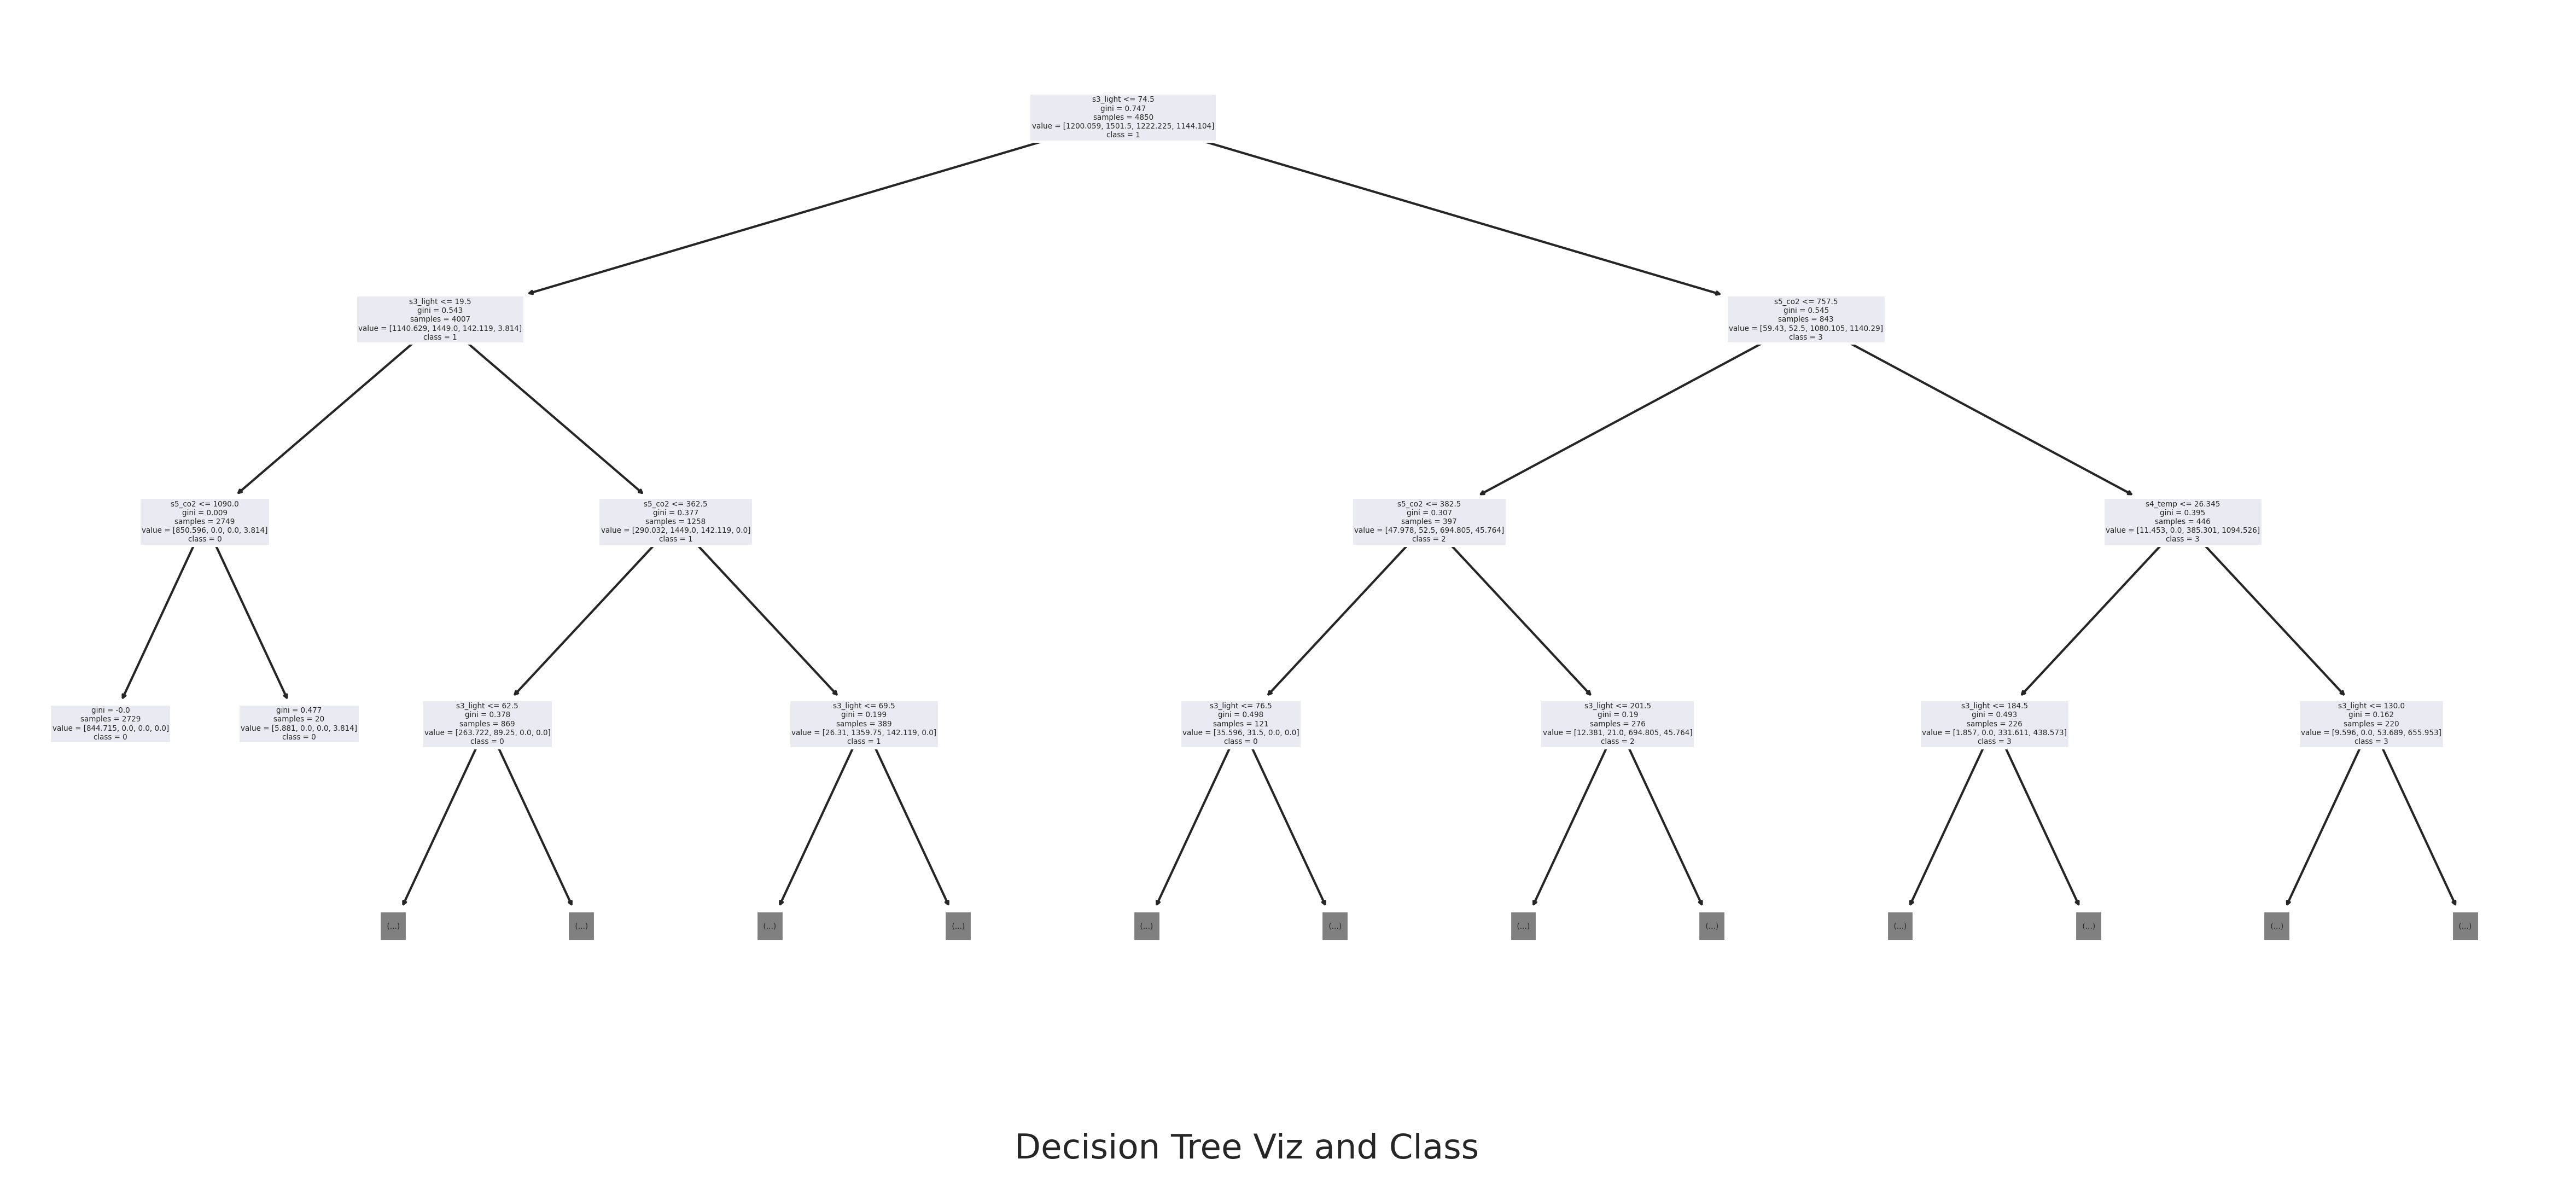

In [167]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create a figure with a higher DPI setting
plt.figure(figsize=(20, 8), dpi=300)
tree.plot_tree(tree_train, feature_names=feature_names, class_names=[str(cls) for cls in tree_train.classes_], max_depth = 3)

# Annotate
plt.figtext(0.5, 0.01, 'Decision Tree Viz and Class', wrap=True, horizontalalignment='center', fontsize=15)

# Save the plot as a high-resolution image
plt.savefig('decision_tree.png', dpi=300)

# Display the plot
plt.show()


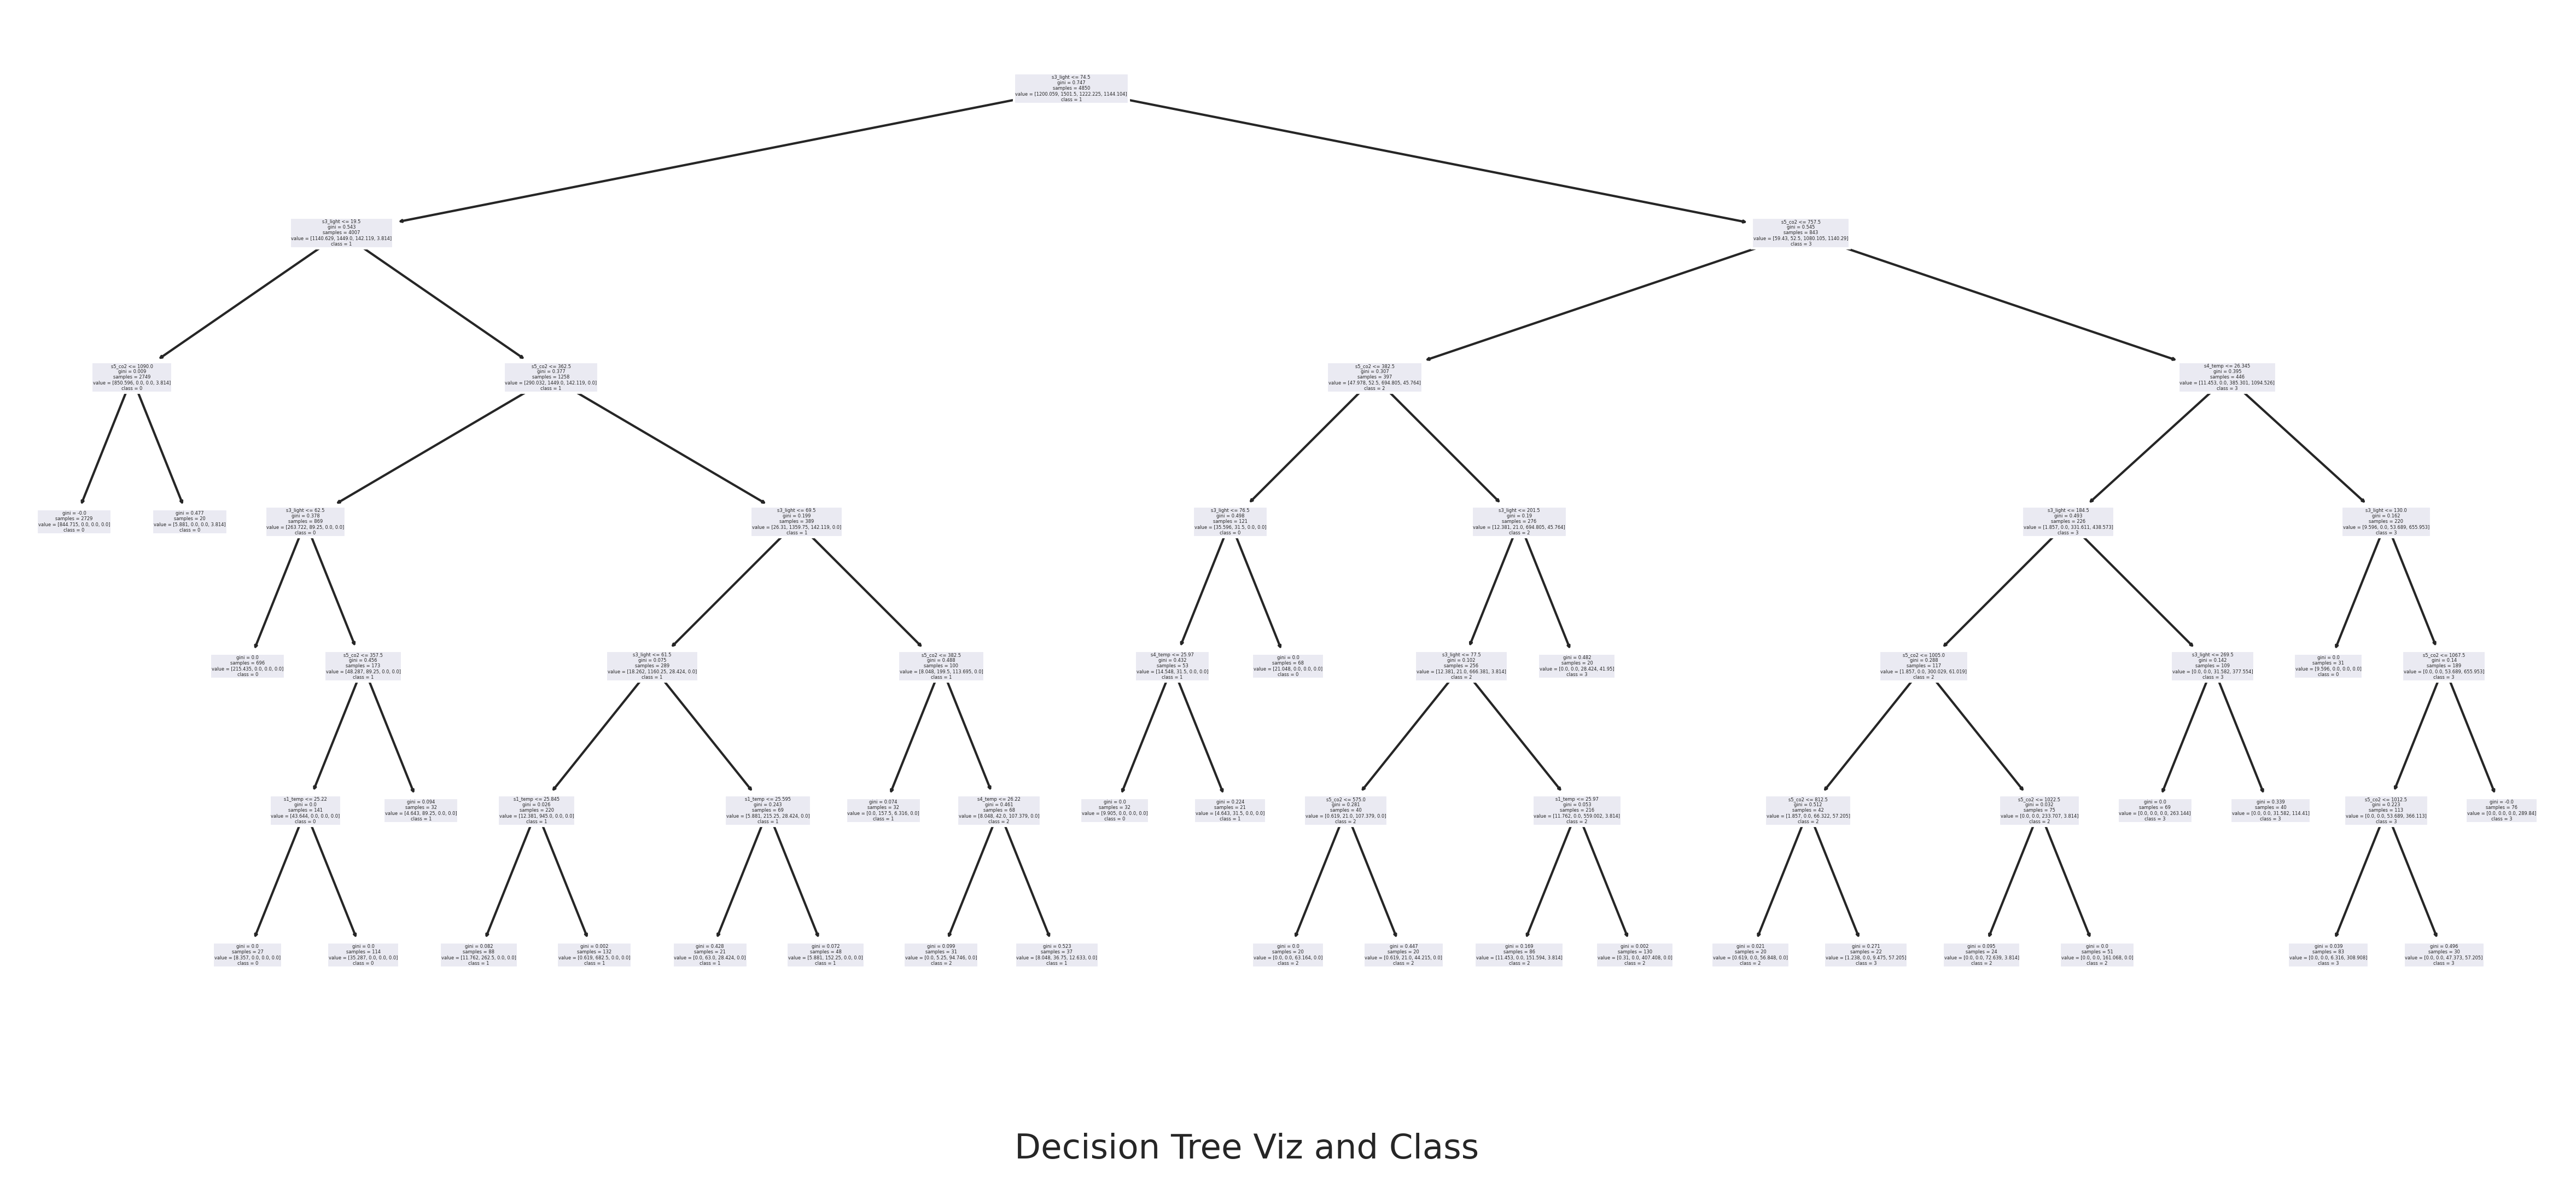

In [168]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create a figure with a higher DPI setting
plt.figure(figsize=(20, 8), dpi=300)
tree.plot_tree(tree_train, feature_names=feature_names, class_names=[str(cls) for cls in tree_train.classes_])

# Annotate
plt.figtext(0.5, 0.01, 'Decision Tree Viz and Class', wrap=True, horizontalalignment='center', fontsize=15)

# Save the plot as a high-resolution image
plt.savefig('decision_tree.png', dpi=300)

# Display the plot
plt.show()


In [169]:
test_im_dicts[:1]

[{'s1_temp': 25.44, 's3_light': 0, 's4_temp': 26.06, 's5_co2': 350}]

In [177]:
new_data =[{'s1_temp': 25, 's3_light': 300, 's4_temp': 25, 's5_co2': 500}]

In [178]:
X_new = dv.transform(new_data)

In [179]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train_im, y_important)
y_pred_new = dt.predict_proba(X_new)

In [181]:
y_pred_classes = np.argmax(y_pred_new, axis=1)

# result class
print(f"Predicted occupation count for this data is {y_pred_classes}")

Predicted occupation count for this data is [3]


In [174]:
df_im = df.copy()

In [175]:
df_im_X = df_im.drop(['room_occupancy_count','date','index','time','hour'], axis = 1)
df_im_y = df_im['room_occupancy_count']

In [176]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

# Create your decision tree classifier with specified hyperparameters
class_weights_test = class_weight.compute_class_weight('balanced', classes = np.unique(df_im_y), y = df_im_y)
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights_val)), max_depth = 6, min_samples_leaf = 20)

# Define the scoring metrics you want to use for cross-validation
scoring = {
    'Precision': make_scorer(precision_score, average='macro'),
    'F1 Score (macro)': make_scorer(f1_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro')
}

# Perform k-fold cross-validation (e.g., k=5) and get results
cv_results = cross_validate(dt, df_im_X, df_im_y, cv=5, scoring=scoring)

# Print the cross-validation results
for metric, scores in scoring.items():
    print(f'{metric}: Mean={cv_results[f"test_{metric}"].mean():.3f}, Std Dev={cv_results[f"test_{metric}"].std():.3f}')


Precision: Mean=0.974, Std Dev=0.007
F1 Score (macro): Mean=0.976, Std Dev=0.005
Recall: Mean=0.978, Std Dev=0.005
